In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/Imagedata'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import os
import cv2

In [ ]:
CATEGORIES = os.listdir(DATA_PATH)
CATEGORIES

['IMAM HASAN JAMI', 'MAHASHETAB HASSAN', 'SADAT BIN MASUD', 'S M FAISAL']

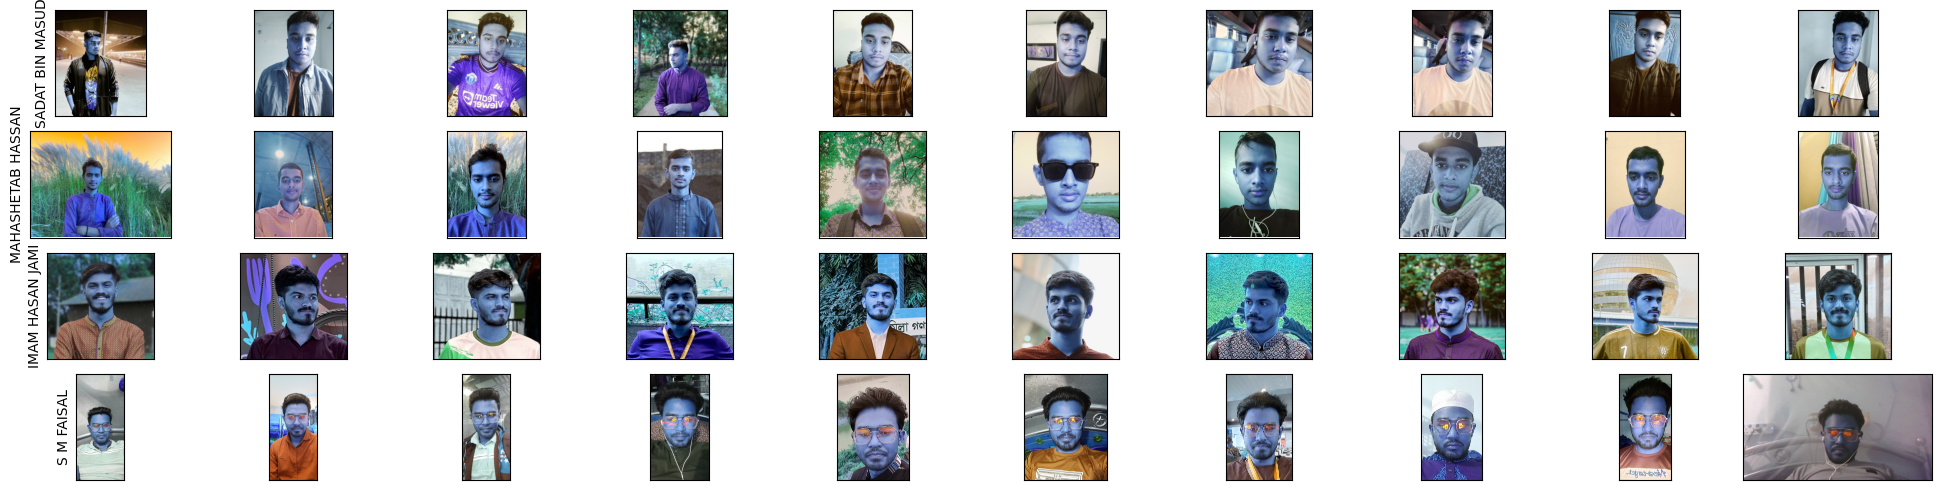

In [ ]:
import random
plt.figure(figsize=(20,5))
i=0
random.shuffle(CATEGORIES)
for c in CATEGORIES:
    path = os.path.join(DATA_PATH,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(4,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
          plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
TRAIN_DATA = []
img_size = 256

for j, c in enumerate(CATEGORIES):
    path = os.path.join(DATA_PATH, c)
    label = j
    for i in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path, i))
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            TRAIN_DATA.append([img, label])

print(len(TRAIN_DATA))

100%|██████████| 10/10 [00:00<00:00, 19.20it/s]

40


In [ ]:
train_imgs=[]
train_labels=[]
for img, label in TRAIN_DATA:
  train_imgs.append(img)
  train_labels.append(label)
import random

# Combine train_imgs and train_labels
combined_data = list(zip(train_imgs, train_labels))

# Shuffle the combined data
random.shuffle(combined_data)

# Unzip the shuffled data back into train_imgs and train_labels
train_imgs_shuffled, train_labels_shuffled = zip(*combined_data)

In [ ]:
train_imgs_np=np.array(train_imgs)
train_labels_np=np.array(train_labels)
test_imgs_np=np.array(train_imgs)
test_labels_np=np.array(train_labels)
print(train_imgs_np.shape, train_labels_np.shape)

(40, 256, 256, 3) (40,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(img_size,img_size,3)),
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(7,7), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),  # Add dropout layer with dropout rate 0.25
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),  # Add dropout layer with dropout rate 0.25
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),  # Add dropout layer with dropout rate 0.25
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),  # Add dropout layer with dropout rate 0.25
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout layer with dropout rate 0.5
    ## output layer
    layers.Dense(4, activation='softmax')  # num_classes is the number of individuals you want to recognize
])


In [ ]:
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=train_imgs_np, y=train_labels_np, epochs=50, validation_split=0.6, batch_size=32)

Epoch 1/50
1/1 [==============================] - 0s 189ms/step - loss: 0.7858 - accuracy: 0.6875 - val_loss: 1.2060 - val_accuracy: 0.5833
Epoch 2/50
1/1 [==============================] - 0s 132ms/step - loss: 0.7745 - accuracy: 0.6875 - val_loss: 1.2024 - val_accuracy: 0.5833
Epoch 3/50
1/1 [==============================] - 0s 114ms/step - loss: 0.7677 - accuracy: 0.5625 - val_loss: 1.2029 - val_accuracy: 0.5833
Epoch 4/50
1/1 [==============================] - 0s 107ms/step - loss: 0.6780 - accuracy: 0.6875 - val_loss: 1.2034 - val_accuracy: 0.5833
Epoch 5/50
1/1 [==============================] - 0s 101ms/step - loss: 0.4853 - accuracy: 0.8750 - val_loss: 1.2083 - val_accuracy: 0.5833
Epoch 6/50
1/1 [==============================] - 0s 104ms/step - loss: 0.9635 - accuracy: 0.5000 - val_loss: 1.2103 - val_accuracy: 0.5417
Epoch 7/50
1/1 [==============================] - 0s 100ms/step - loss: 0.6350 - accuracy: 0.6875 - val_loss: 1.2131 - val_accuracy: 0.5417
Epoch 8/50
1/1 [====

In [ ]:
# Save the trained model
model.save('mask_detection_model.h5')
model = keras.models.load_model('mask_detection_model.h5')

In [ ]:
import pickle

# Save the model to a pickle file
with open('/content/drive/MyDrive/models/model.pkl', 'wb') as pout:
    pickle.dump(model, pout)


In [ ]:
import pickle
# Load the model from the pickle file
with open('/content/drive/MyDrive/models/model.pkl', 'rb') as pin:
    model = pickle.load(pin)


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
import tensorflow as tf

# Function to capture photo using webcam in Google Colab
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    # Capture photo using webcam
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Load your trained model here (replace 'your_model.h5' with the actual filename)
#model = tf.keras.models.load_model('mask_detection_model.h5')

# Run person detection on webcam
def detect_person():
    while True:
        filename = take_photo()
        frame = cv2.imread(filename)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Preprocess the frame
        resized_frame = cv2.resize(frame, (img_size, img_size))
        normalized_frame = resized_frame / 255.0  # Normalize pixel values
        input_data = np.expand_dims(normalized_frame, axis=0)

        # Predict using the loaded model
        prediction = model.predict(input_data)
        print("Raw Predictions:", prediction)

        # Get the label with the highest probability
        predicted_label = np.argmax(prediction)

        # Display the result on the frame
        if prediction[0, predicted_label] > 0.3:  # Adjust the threshold as needed
            name = CATEGORIES[predicted_label]
            cv2.putText(frame, f"Person: {name}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        else:
            cv2.putText(frame, "Not Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        # Display the frame
        plt.imshow(frame)
        plt.axis('off')
        plt.show()

        # Ask user to continue or not
        cont = input("Do you want to continue? (y/n): ")
        if cont.lower() != 'y':
            break

# Run person detection
detect_person()


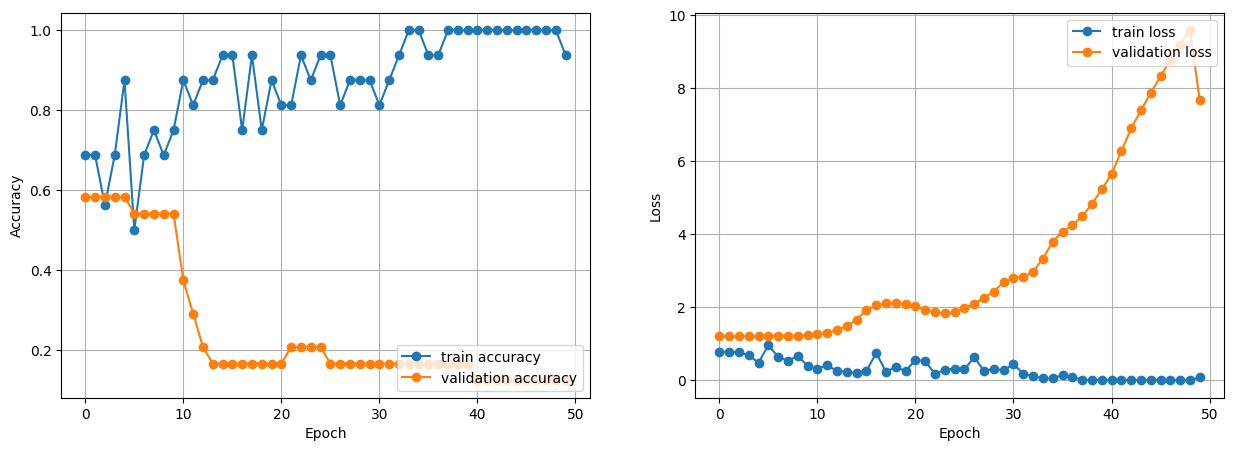

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

2/2 [==============================] - 0s 28ms/step


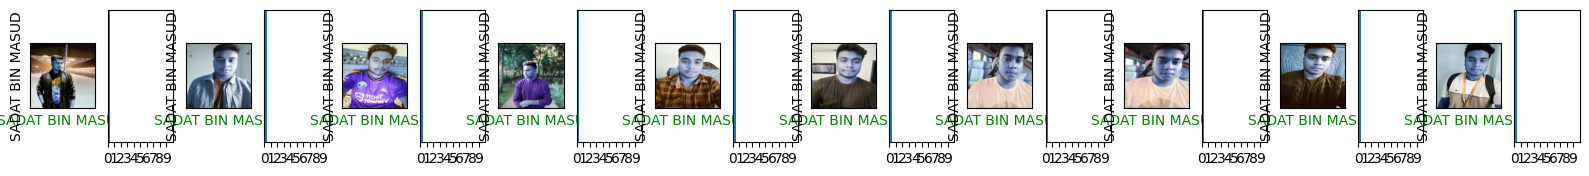

In [ ]:
rows = 5
cols = 10

plt.figure(figsize=(20,10))
for i in range(10):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(test_imgs_np[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(CATEGORIES[test_labels_np[i].item()])
    prediction = model.predict(test_imgs_np)

    if test_labels_np[i].item() == np.argmax(prediction[i]):
        plt.xlabel(CATEGORIES[np.argmax(prediction[i])], color='g')
    else:
        plt.xlabel(CATEGORIES[np.argmax(prediction[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(4), prediction[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()